<a href="https://colab.research.google.com/github/MikeyClausen/Prediction-of-Product-Sales/blob/other/belt1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Employee Attrition

###Imports

In [ ]:
#Importing data, and modules.
filename = '/content/drive/MyDrive/DOJO/IMPORTS/Mod_employee_attrition.xlsx'
import pandas as pd
import numpy as np
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
df = pd.read_excel(filename)

#Data Cleaning

In [ ]:
#Explore data, using diplay max columns, for easier anaylsis of column data.
pd.set_option('display.max_columns', None)
df.head(5)

,Age,Attrition,BusinessTravel,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,DailyRate,WeeklyRate,YearlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,Sales,1,2,Life Sciences,1,1,2,Female,94,3,2,Sales Executive,4,Single,752,3760,195520,8,Y,Yes,11,3,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,Research & Development,8,1,Life Sciences,1,2,3,NaN,61,2,2,Research Scientist,2,Married,488,2440,126880,1,Y,No,23,4,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,Research & Development,2,2,Other,1,4,4,NaN,92,2,1,Laboratory Technician,3,Single,736,3680,191360,6,Y,Yes,15,3,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,Research & Development,3,4,Life Sciences,1,5,4,Female,56,3,1,Research Scientist,3,Married,448,2240,116480,1,Y,Yes,11,3,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,Research & Development,2,1,Medical,1,7,1,NaN,40,3,1,Laboratory Technician,2,Married,320,1600,83200,9,Y,No,12,3,4,80,1,6,3,3,2,2,2,2


##Identify and address any duplicate values.

In [ ]:
#Find duplicates
df.duplicated().sum()

5

In [ ]:
#Drop them since they are duplicated rows.
df = df.drop_duplicates()

In [ ]:
#Check they dropped successfully.
df.duplicated().sum()

0

##Identify and address missing values in dataset.

In [ ]:
#Using isna to look for NaN entries, we see that Gender is missing many entries.
df.isna().sum()

Age                           0
Attrition                     0
BusinessTravel                0
Department                    0
DistanceFromHome              0
Education                     0
EducationField                0
EmployeeCount                 0
EmployeeNumber                0
EnvironmentSatisfaction       0
Gender                      882
HourlyRate                    0
JobInvolvement                0
JobLevel                      0
JobRole                       0
JobSatisfaction               0
MaritalStatus                 0
DailyRate                     0
WeeklyRate                    0
YearlyRate                    0
NumCompaniesWorked            0
Over18                        0
OverTime                      0
PercentSalaryHike             0
PerformanceRating             0
RelationshipSatisfaction      0
StandardHours                 0
StockOptionLevel              0
TotalWorkingYears             0
TrainingTimesLastYear         0
WorkLifeBalance               0
YearsAtC

In [ ]:
#Shows that 590 of the enteries are Female.
df['Gender'].value_counts()

Female    588
Name: Gender, dtype: int64

###'Gender' Column
####Strategy

*   Replace missing values with the opposite gender, the ratio seems accurate.

####Justification

*   The missing data would be 'Male' 885 males, this would make up 59%~ of the employee force leaving 'Female at 41%~ of the employee force.






In [ ]:
#Use fillna to replace NaN entries. Check that new values took.
df['Gender'].fillna('Male', inplace=True)
df['Gender'].value_counts()

<ipython-input-326-7c9837225626>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Gender'].fillna('Male', inplace=True)


Male      882
Female    588
Name: Gender, dtype: int64

In [ ]:
#Double Checking
df.isna().sum()

Age                         0
Attrition                   0
BusinessTravel              0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
DailyRate                   0
WeeklyRate                  0
YearlyRate                  0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSince

##Ensure all columns match the data types listed in the data dictionary.

In [ ]:
#Use info to see data types and compare to provided Data Dictionary.
df.info()
#Incorrect Data types are:  Hourlyrate, YearsAtCompany
#Not in data dictionary: EmployeeNumber, weeklyrate, yearlyrate

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1470 entries, 0 to 1474
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   Department                1470 non-null   object
 4   DistanceFromHome          1470 non-null   int64 
 5   Education                 1470 non-null   int64 
 6   EducationField            1470 non-null   object
 7   EmployeeCount             1470 non-null   int64 
 8   EmployeeNumber            1470 non-null   int64 
 9   EnvironmentSatisfaction   1470 non-null   int64 
 10  Gender                    1470 non-null   object
 11  HourlyRate                1470 non-null   object
 12  JobInvolvement            1470 non-null   int64 
 13  JobLevel                  1470 non-null   int64 
 14  JobRole                 

In [ ]:
#Check HourlyRate for value inconsistences
df['HourlyRate'].value_counts().tail()

53     14
68     14
38     13
34     12
94_     1
Name: HourlyRate, dtype: int64

In [ ]:
#Fixing value m arked as 94_
df.replace('94_',94,inplace=True)

In [ ]:
#Was it replaced.
df['HourlyRate'].value_counts().tail()

31    15
53    14
68    14
38    13
34    12
Name: HourlyRate, dtype: int64

In [ ]:
#Check that fixing 94_ fixed data type for hourly rate.
df['HourlyRate'].info()

<class 'pandas.core.series.Series'>
Int64Index: 1470 entries, 0 to 1474
Series name: HourlyRate
Non-Null Count  Dtype
--------------  -----
1470 non-null   int64
dtypes: int64(1)
memory usage: 23.0 KB


In [ ]:
#Is this due to a value being called as an object (typo)
df['YearsAtCompany'].value_counts().tail()

37    1
40    1
5!    1
34    1
30    1
Name: YearsAtCompany, dtype: int64

In [ ]:
#It was so we replace 5! with 5
df.replace('5!',5,inplace=True)

In [ ]:
#Check that it worked.
df['YearsAtCompany'].value_counts().tail()

23    2
37    1
40    1
34    1
30    1
Name: YearsAtCompany, dtype: int64

In [ ]:
#Did this fix YearsAtCompany's Data type.
df['YearsAtCompany'].info()

<class 'pandas.core.series.Series'>
Int64Index: 1470 entries, 0 to 1474
Series name: YearsAtCompany
Non-Null Count  Dtype
--------------  -----
1470 non-null   int64
dtypes: int64(1)
memory usage: 23.0 KB


#Identify and address any inappropriate or unusual data points

In [ ]:
#Creating a filter to give int values
types = df.dtypes
data_types = types[(types == "int64")]
data_types
print(data_types.index)

Index(['Age', 'DistanceFromHome', 'Education', 'EmployeeCount',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobSatisfaction', 'DailyRate',
       'WeeklyRate', 'YearlyRate', 'NumCompaniesWorked', 'PercentSalaryHike',
       'PerformanceRating', 'RelationshipSatisfaction', 'StandardHours',
       'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear',
       'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole',
       'YearsSinceLastPromotion', 'YearsWithCurrManager'],
      dtype='object')


In [ ]:
#Create a method, to display unique values for assement.
for column in data_types.index:
    # Display the unique values from the column
    print(column)
    print(df[column].unique())
    print('\n')

Age
[ 41  49  37  33  27  32  59  30  38  36  35  29  31  34  28  22  53  24
  21  42  44  46  39  43  50  26  48  55  45  56  23  51  40  54 578  20
  25  58  19  57  52  47  18  60]


DistanceFromHome
[ 1  8  2  3 24 23 27 16 15 26 19 21  5 11  9  7  6 10  4 25 12 18 29 22
 14 20 28 17 13]


Education
[2 1 4 3 5]


EmployeeCount
[1]


EmployeeNumber
[   1    2    4 ... 2064 2065 2068]


EnvironmentSatisfaction
[2 3 4 1]


HourlyRate
[ 94  61  92  56  40  79  81  67  44  84  49  31  93  50  51  80  96  78
  45  82  53  83  58  72  48  42  41  86  97  75  33  37  73  98  36  47
  71  30  43  99  59  95  57  76  87  66  55  32  52  70  62  64  63  60
 100  46  39  77  35  91  54  34  90  65  88  85  89  68  69  74  38]


JobInvolvement
[3 2 4 1]


JobLevel
[2 1 3 4 5]


JobSatisfaction
[4 2 3 1]


DailyRate
[752 488 736 448 320 632 648 536 352 672 392 248 744 400 408 640 768 624
 360 656 424 664 464 576 384 336 328 688 776 600 264 296 584 784 288 376
 568 240 344 792 472 760 456 608 696

###'Age' Column
####Strategy

*   Replace 578, with 57.

####Justification

*   Most likely a typo, 1 year difference if it was supposed to be 58, this is more accurate than using mean()

In [ ]:
#Only odd value seems to be 578 in the Age column.
df['Age'].replace(578,57,inplace=True)

In [ ]:
#Check it worked.
df['Age'].unique()

array([41, 49, 37, 33, 27, 32, 59, 30, 38, 36, 35, 29, 31, 34, 28, 22, 53,
       24, 21, 42, 44, 46, 39, 43, 50, 26, 48, 55, 45, 56, 23, 51, 40, 54,
       57, 20, 25, 58, 19, 52, 47, 18, 60])

In [ ]:
df['HourlyRate'].unique()

array([ 94,  61,  92,  56,  40,  79,  81,  67,  44,  84,  49,  31,  93,
        50,  51,  80,  96,  78,  45,  82,  53,  83,  58,  72,  48,  42,
        41,  86,  97,  75,  33,  37,  73,  98,  36,  47,  71,  30,  43,
        99,  59,  95,  57,  76,  87,  66,  55,  32,  52,  70,  62,  64,
        63,  60, 100,  46,  39,  77,  35,  91,  54,  34,  90,  65,  88,
        85,  89,  68,  69,  74,  38])

##Data Exploration.

###Two univariate exploratory visualizations.


In [ ]:
#Correlate numeric data, for ease of use later.
corr = df.corr(numeric_only=True);

In [ ]:
#Looking for min/max HourlyRate to set xticks.
df['HourlyRate'].describe()

count    1470.000000
mean       65.891156
std        20.329428
min        30.000000
25%        48.000000
50%        66.000000
75%        83.750000
max       100.000000
Name: HourlyRate, dtype: float64

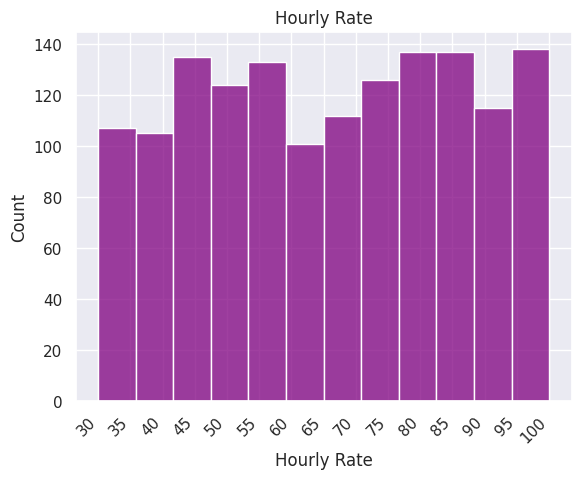

In [ ]:
#Simple Histogram to compare Male vs. Female Employee counts.
sns.set(style='darkgrid')
ax=sns.histplot(df['HourlyRate'], color='purple')
ax.set_xticks([30,35,40,45,50,55,60,65,70,75,80,85,90,95,100])
ax.set_xticklabels(ax.get_xticklabels(),rotation=45, horizontalalignment='right')
ax.set_xlabel('Hourly Rate')
ax.set_title('Hourly Rate');

Histogram to show HourlyRate counts across employees is evenly distributed.

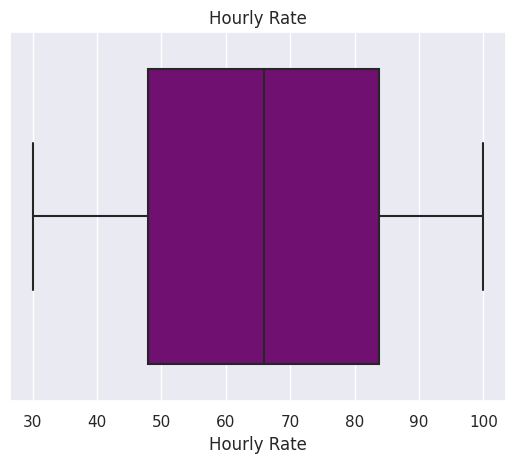

In [ ]:
#Boxplot to show HourlyRate distrubition.
sns.set(style='darkgrid')
ax=sns.boxplot(x=df['HourlyRate'], color='purple');
ax.set_xlabel('Hourly Rate')
ax.set_title('Hourly Rate');

###This boxplot shows that most of the hourly rates land between 50-80.

##Two multivariate exploratory visualizations

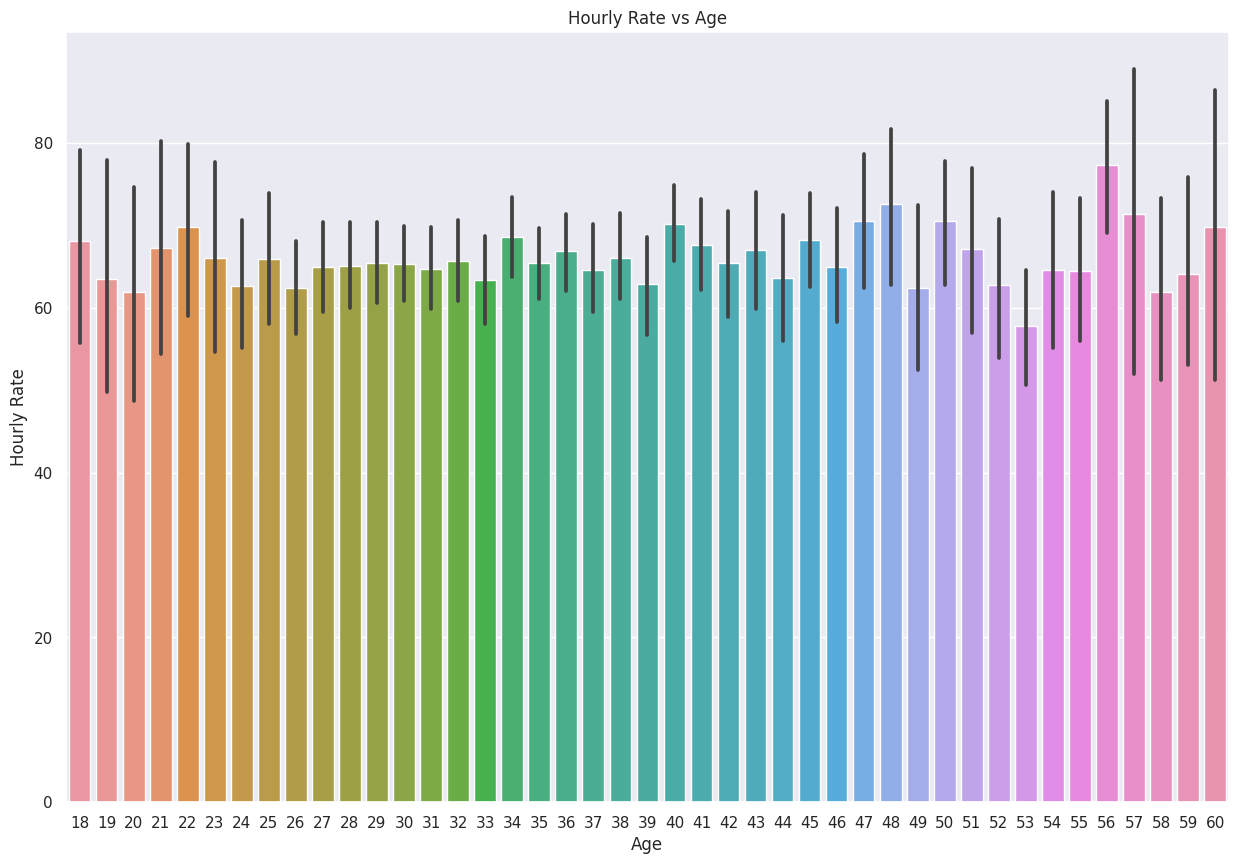

In [ ]:
#Barplot with Seaborn
plt.figure(figsize=(15,10))
sns.set(style='darkgrid')
plt.tight_layout()
sns.color_palette("flare")
ax=sns.barplot(data=df,x='Age',y='HourlyRate')
ax.set_ylabel('Hourly Rate')
ax.set_title('Hourly Rate vs Age');

##This barplot shows that age, is minimally effecting peoples Hourlyrate, but in some cases it does, this is most likely due to those individuals being with the company for longer.

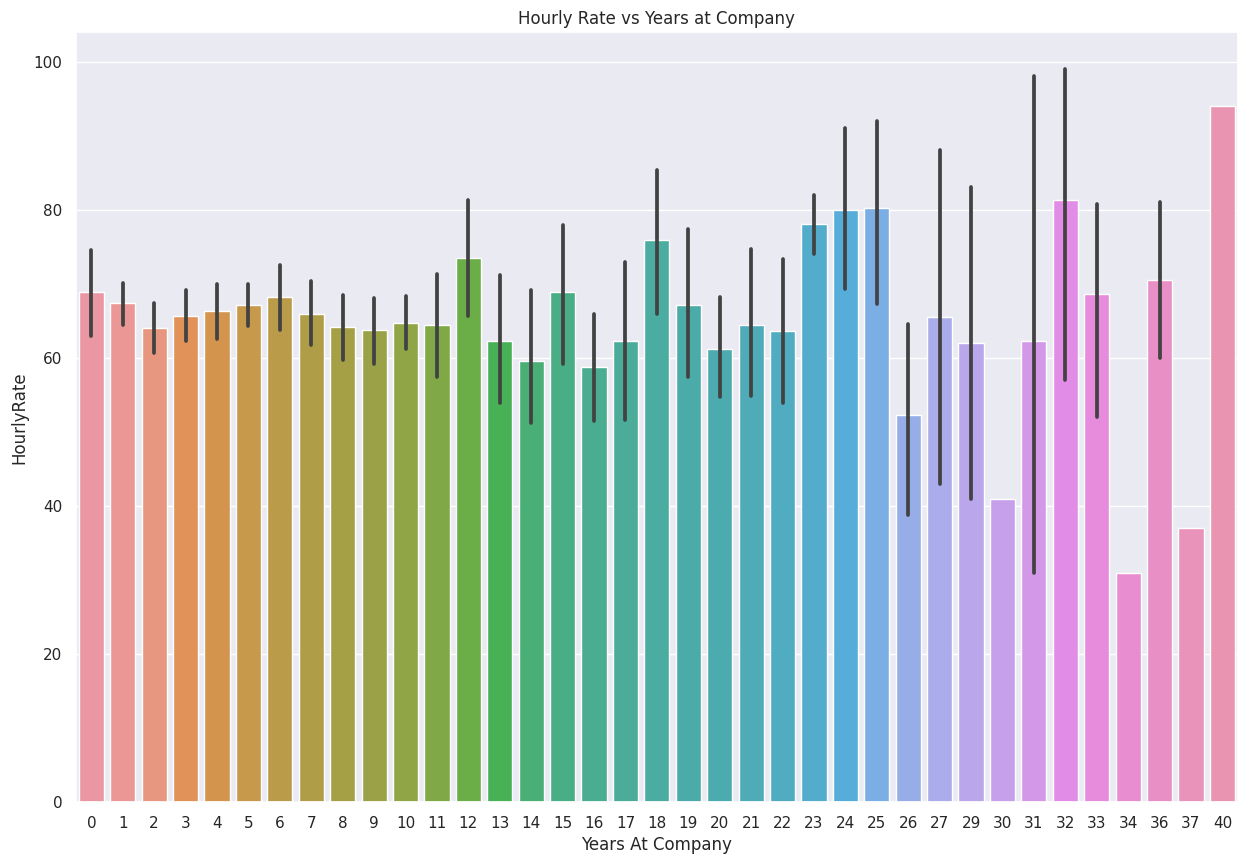

In [ ]:
plt.figure(figsize=(15,10))
sns.set(style='darkgrid')
plt.tight_layout()
ax=sns.barplot(data=df,x='YearsAtCompany',y='HourlyRate')
ax.set_xlabel('Years At Company')
ax.set_title('Hourly Rate vs Years at Company'); 

###Barplot showing that Years at Company effects hourly rate less than initially thought.

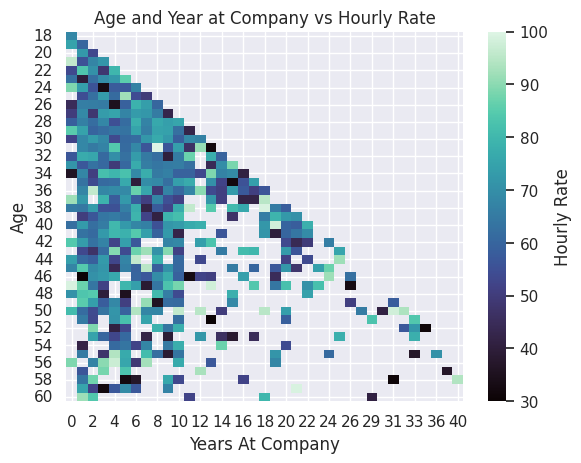

In [ ]:
plt.tight_layout()
df_heatmap = df.pivot_table(index='Age', columns='YearsAtCompany', values='HourlyRate')
ax=sns.heatmap(df_heatmap, cmap='mako',cbar_kws={'label': 'Hourly Rate'})
ax.set_xlabel('Years At Company')
ax.set_title('Age and Year at Company vs Hourly Rate');

###This heatmap further dives into the how HourlyRate is effected by Years at the Company.

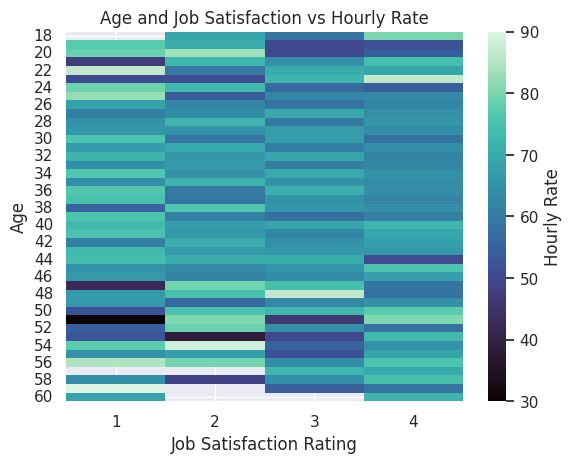

In [ ]:
plt.tight_layout()
df_heatmap = df.pivot_table(index='Age', columns='JobSatisfaction', values='HourlyRate')
ax=sns.heatmap(df_heatmap, cmap='mako',cbar_kws={'label': 'Hourly Rate'})
ax.set_xlabel('Job Satisfaction Rating')
ax.set_title('Age and Job Satisfaction vs Hourly Rate');

###Heatmap to show Hourly rate, against Job Satisfaction and Age.